In [1]:
import numpy as np
import random

In [2]:
nchan = 84
Nst = 100

In [9]:
import os, sys
strunctfiledir='/Users/huifangwang/MULANa/humanCon/100-count-length-csv/'
dirs = os.listdir(strunctfiledir)
AllMat=[]

# This would print all the files and directories
for bfile in dirs:
    strunctfile=strunctfiledir+bfile+'/TVB/count.csv'
    try:
        csv = np.genfromtxt (strunctfile, delimiter="")
    #chan_ch=random.sample(set(range(84)), nchan)
    except:
        continue
    sMat_raw=np.log10(csv/32+0.00001)
    sMat_norm=sMat_raw/sMat_raw.max()
    sMat_norm[sMat_norm < 0] = 0
    if np.shape(AllMat)[0]<1:
        AllMat = np.expand_dims(sMat_norm,axis=2)
    else:
        AllMat = np.concatenate([AllMat,np.expand_dims(sMat_norm,axis=2)],axis=2)
    #Mat_raw=csv[chan_ch][:,chan_ch]
    #Mat_norm=Mat_raw/Mat_raw.max()
    

In [10]:
import scipy.io
filename = strunctfiledir + 'stru100hConN84p32.mat'
a={'sMat': AllMat}

scipy.io.savemat(filename,a)

In [4]:
AllMat.shape

(84, 84, 100)

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


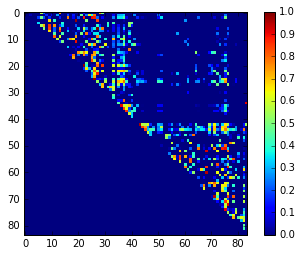

In [11]:
plt.imshow(AllMat[:,:,5],interpolation='nearest')
plt.colorbar()
    

32

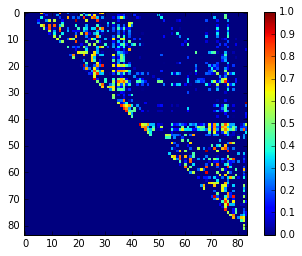

In [12]:

plt.imshow(AllMat[:,:,6],interpolation='nearest')
plt.colorbar()

np.sum(sMat_norm>0.8)

In [13]:
sMat_raw=np.log10(csv+0.00001)

sMat_norm=sMat_raw/sMat_raw.max()

#plt.imshow(sMat_norm)

np.sum(sMat_norm>0.8)

90